# **Análisis del Precio de las tortillas en México del 2007 al 2024**

In [16]:
# Cargar las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [3]:
# Cargar el dataset 
df_tortilla_prices = pd.read_csv('../data/processed/tortilla_prices_sin_nulos.csv')
df_tortilla_prices.head(15)

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90
1,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00
2,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00
3,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00
4,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.00
5,Colima,Colima,2007,1,10,Mom and Pop Store,10.00
6,Chiapas,Tuxtla Gutiérrez,2007,1,10,Mom and Pop Store,9.20
7,Chihuahua,Chihuahua,2007,1,10,Mom and Pop Store,10.00
8,D.F.,D.F.,2007,1,10,Mom and Pop Store,8.33
9,D.F.,ZM D.F.,2007,1,10,Mom and Pop Store,7.67


In [ ]:
df_tortilla_prices['Year'] = pd.to_datetime(df_tortilla_prices['Year'], format='%Y')

#### **1.-¿Cómo ha evolucionado el precio de la tortilla en México entre 2007 al 2024?**

In [14]:
# Agrupamos
promedio_anula = df_tortilla_prices.groupby('Year')['Price per kilogram'].mean()
print(f'Promedio anual:\n{promedio_anula}')

Promedio anual:
Year
2007     7.399119
2008     7.598889
2009     8.094949
2010     8.670437
2011     9.737406
2012    11.265235
2013    11.710039
2014    11.619433
2015    11.632321
2016    11.855625
2017    12.520789
2018    12.892546
2019    13.419217
2020    14.033255
2021    15.273879
2022    17.333422
2023    19.007899
2024    19.564326
Name: Price per kilogram, dtype: float64


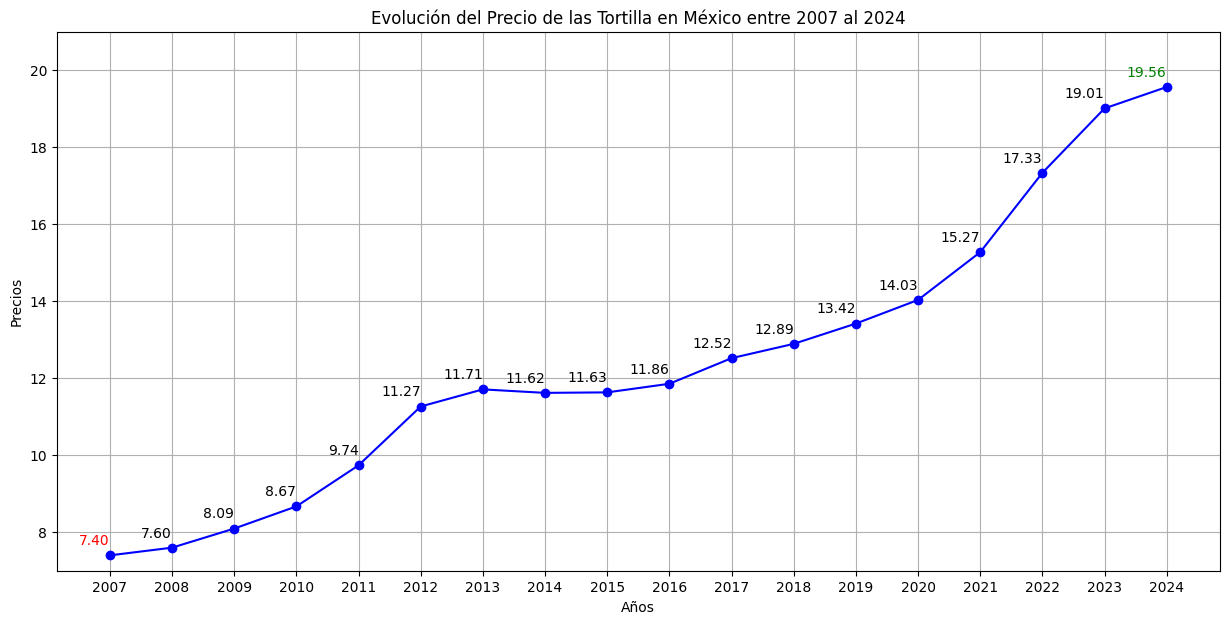

In [46]:
# year = df_tortilla_prices['Year']
# price_per_kilogram = df_tortilla_prices['Price per kilogram']

min_precio = promedio_anula.values.min()
max_precio = promedio_anula.values.max()

plt.figure(figsize=(15,7))
plt.plot(promedio_anula.index, promedio_anula.values, marker='o', linestyle='-', color='b')

# Agregar los valores de ventas en cada punto con colores para min y max
for x, y in zip(promedio_anula.index, promedio_anula.values):
    color = 'black'  # Color por defecto
    offeset = 0.2
    va = 'bottom'
    if y == min_precio:
        color = 'red'  # Color para el mínimo
        va = 'top'
    elif y == max_precio:
        color = 'green'  # Color para el máximo
        offeset = 0.2
        va = 'bottom'
    plt.text(x, y + offeset, f'{y:.2f}', ha='right', va='bottom', color=color)

plt.ylim(7,21)
plt.title('Evolución del Precio de las Tortilla en México entre 2007 al 2024')
plt.xlabel('Años')
plt.ylabel('Precios')
plt.grid(True)

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))

plt.show()

##### **2.-¿Existen diferencias significa entre estados del 2007 y el 2024?**

In [ ]:
year_2007 = df_tortilla_prices['Year'] == 2007

states_2007 = df_tortilla_prices[year_2007]

promedio_state_2007 = states_2007.groupby('State')['Price per kilogram'].mean()


print(f'{"Precio promedio por estados del 2007":<20}')
print(f'{"Estado":<20} {"Precio(MXN$)"}')
for estados, precio in promedio_state_2007.items():
    print(f'{estados:<25} ${precio:>5.2f}')

Precio promedio por estados del 2007
Estado               Precio(MXN$)
Aguascalientes            $ 7.72
Baja California           $ 8.47
Baja California Sur       $ 7.57
Campeche                  $ 7.43
Chiapas                   $ 6.94
Chihuahua                 $ 7.35
Coahuila                  $ 7.32
Colima                    $ 7.21
D.F.                      $ 6.98
Durango                   $ 6.99
Edo. México               $ 6.90
Guanajuato                $ 7.32
Guerrero                  $ 7.78
Hidalgo                   $ 7.04
Jalisco                   $ 7.11
Michoacán                 $ 7.11
Morelos                   $ 7.86
Nayarit                   $ 7.17
Nuevo León                $ 7.18
Oaxaca                    $ 6.81
Puebla                    $ 6.99
Querétaro                 $ 7.26
Quintana Roo              $ 7.59
San Luis Potosí           $ 7.24
Sinaloa                   $ 7.21
Sonora                    $ 8.56
Tabasco                   $ 7.67
Tamaulipas                $ 7.57
Tlaxc

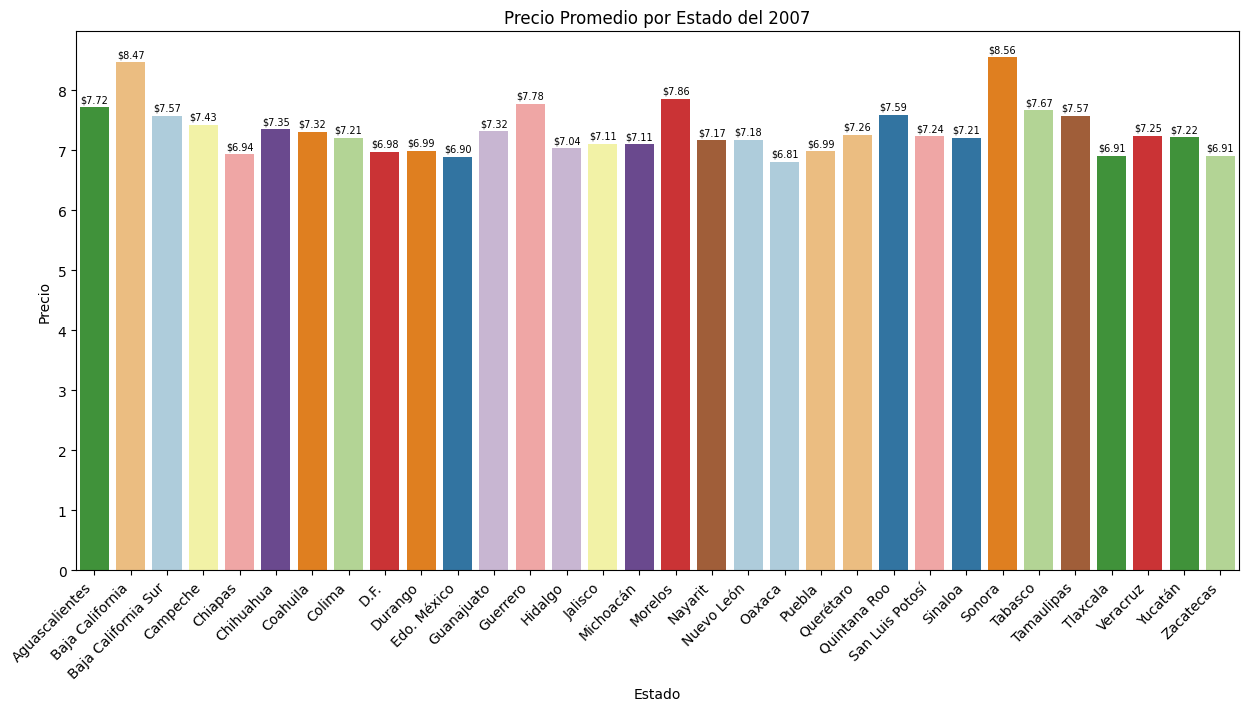

In [92]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x=promedio_state_2007.index, y=promedio_state_2007.values, hue=promedio_state_2007, palette='Paired', legend=False)

# Añadir las etiquetas de valor en cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05,
            f'${height:.2f}', ha='center', va='bottom', fontsize=7)

plt.title('Precio Promedio por Estado del 2007')
plt.xlabel('Estado')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')

plt.show()

In [87]:
year_2024 = df_tortilla_prices['Year'] == 2024

states_2024 = df_tortilla_prices[year_2024]

promedio_state_2024 = states_2024.groupby('State')['Price per kilogram'].mean() 

print(f'{"Precio promedio por estados del 2024":<20}')
print(f'{"Estado":<20} {"Precio(MXN$)"}')
for estados, precio in promedio_state_2024.items():
    print(f'{estados:<25} ${precio:>5.2f}')

Precio promedio por estados del 2024
Estado               Precio(MXN$)
Aguascalientes            $17.56
Baja California           $21.64
Baja California Sur       $20.15
Campeche                  $19.12
Chiapas                   $18.12
Chihuahua                 $21.44
Coahuila                  $21.56
Colima                    $20.88
D.F.                      $17.19
Durango                   $19.21
Edo. México               $16.93
Guanajuato                $18.56
Guerrero                  $20.81
Hidalgo                   $18.39
Jalisco                   $19.51
Michoacán                 $17.74
Morelos                   $19.98
Nayarit                   $19.00
Nuevo León                $20.22
Oaxaca                    $19.34
Puebla                    $15.67
Querétaro                 $19.48
Quintana Roo              $19.82
San Luis Potosí           $18.45
Sinaloa                   $20.06
Sonora                    $21.89
Tabasco                   $18.25
Tamaulipas                $21.37
Tlaxc

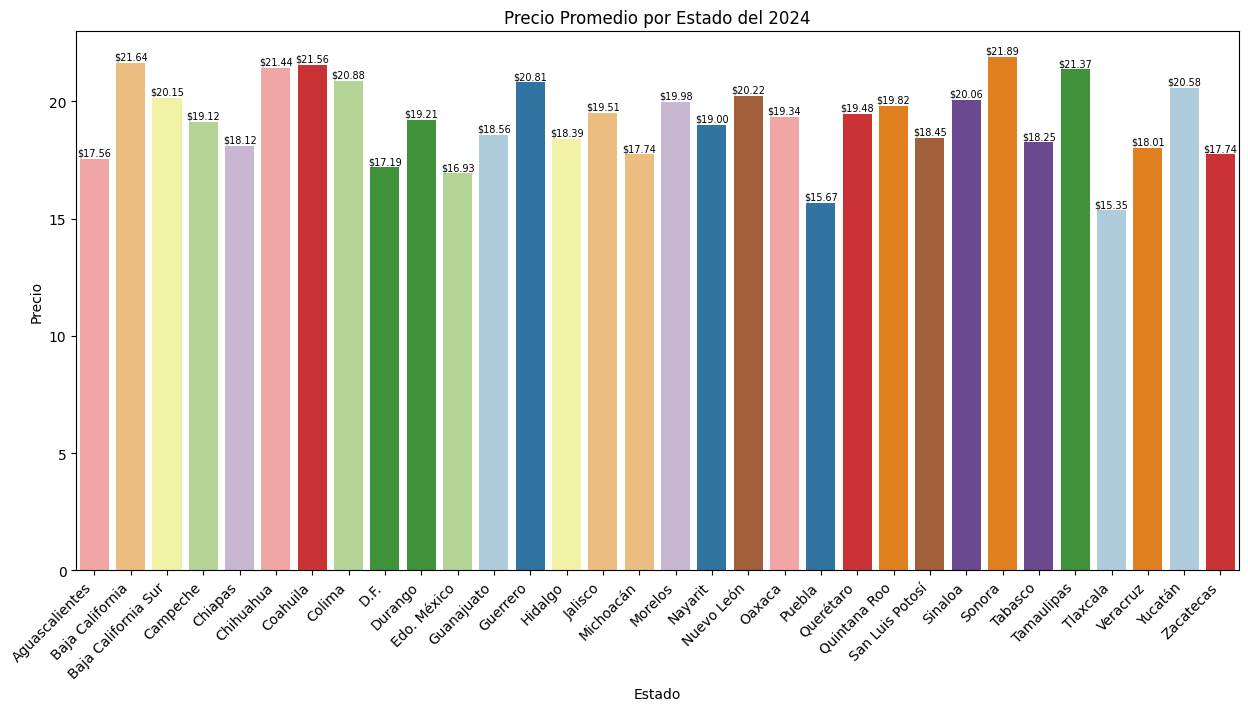

In [91]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x=promedio_state_2024.index, y=promedio_state_2024.values, hue=promedio_state_2024, palette='Paired', legend=False)

# Añadir las etiquetas de valor en cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05,
            f'${height:.2f}', ha='center', va='bottom', fontsize=7)

plt.title('Precio Promedio por Estado del 2024')
plt.xlabel('Estado')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')

plt.show()

##### **3.-¿Hay algun estado que destaca del 2007 y 2024?**

##### **4.-¿Qué años registron cambios abruptos o comportamientos atípicos?**

##### **5.-¿Cuál es la tendencias general del precio en el país?**

##### **6.-¿Qué factores podrían influir en estas diferencias?**

##### **7.-¿Es posible encontrar patrones estancionales o cíclicos?**